In [55]:
import tensorflow as tf

#!git clone https://github.com/tensorflow/models
import pandas as pd
import glob
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import cv2


   label        x1      x2       y1        y2  img
0      0  0.433994  0.3125  0.02160  0.029805    5
1      0  0.713994  0.4500  0.02160  0.029805    5
2      0  0.712632  0.5000  0.10475  0.908688    5


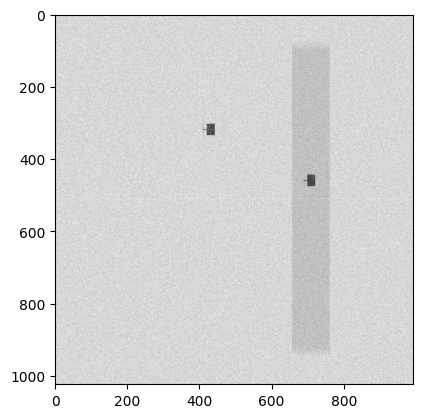

In [56]:
IMG_SIZE = ( 992,1024)
path = "./"
path_dataset_util = "data/models/research/object_detection/utils"


#for example, this is how we would read one file
data = pd.read_csv('17.txt',sep=" ", header = None)
data.columns = ["label", "x1", "x2", "y1","y2" ]
data["img"] = 5
print (data)

def draw_bounding_boxes(im, bbox):
    n = len(bbox)
    for i in range(n):
        _, x1, y1, w, h,_ = bbox.iloc[i]
        x1 *= IMG_SIZE[0]
        w  *= IMG_SIZE[0]
        y1 *= IMG_SIZE[1]
        h  *= IMG_SIZE[1]

        cv2.rectangle(im, (int(x1-w/2), int(y1-h/2)), (int(x1 + w/2) , int(y1+h/2)), (255,0,0), 4)

im = plt.imread("17.bmp")
im = 255 - np.stack((im,)*3, axis=-1)
#draw_bounding_boxes(im,data)
plt.imshow(im)

In [57]:
all_files = glob.glob(os.path.join(path, "*.txt"))

#create a list of all tables
li = []

# read each table, and append list
for i, f in enumerate(all_files):
    df = pd.read_csv(f, sep=" ", header=None)
    df.columns = ["label", "x", "y", "w", "h"]
    df["img"] = f[5:-4]
    li.append(df)

# unify into one table
df = pd.concat(li, axis=0, ignore_index=False)

display(df)


,label,x,y,w,h,img
0,0,0.004276,0.562500,0.008552,0.259492,
1,0,0.099695,0.562500,0.097714,0.259492,
2,0,0.239695,0.562500,0.097714,0.259492,
3,0,0.379695,0.562500,0.097714,0.259492,
4,0,0.519695,0.562500,0.097714,0.259492,
...,...,...,...,...,...,...
17,0,0.981066,0.625000,0.000840,0.414062,
18,0,0.006010,0.500000,0.012020,0.804846,
19,0,0.975371,0.500000,0.049258,0.804846,
20,0,0.110065,0.722222,0.220131,0.123020,


,label,x,y,w,h,img


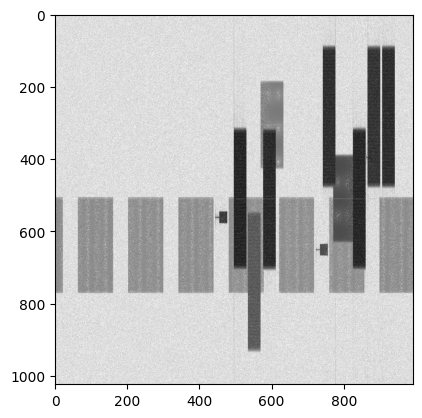

In [58]:
# load image
im = plt.imread("2.bmp")
im = 255 - np.stack((im,)*3, axis=-1)

# x: width
# y: height
bbox_2 = df.loc[df['img'] == "2"]

display(bbox_2)



def draw_bounding_boxes(im, bbox):
    n = len(bbox)
    for i in range(n):
        _, x1, y1, w, h,_ = bbox.iloc[i]
        x1 *= IMG_SIZE[0]
        w  *= IMG_SIZE[0]
        y1 *= IMG_SIZE[1]
        h  *= IMG_SIZE[1]

        cv2.rectangle(im, (int(x1-w/2), int(y1-h/2)), (int(x1 + w/2) , int(y1+h/2)), (255,0,0), 4)


draw_bounding_boxes(im,bbox_2)

plt.imshow(im)

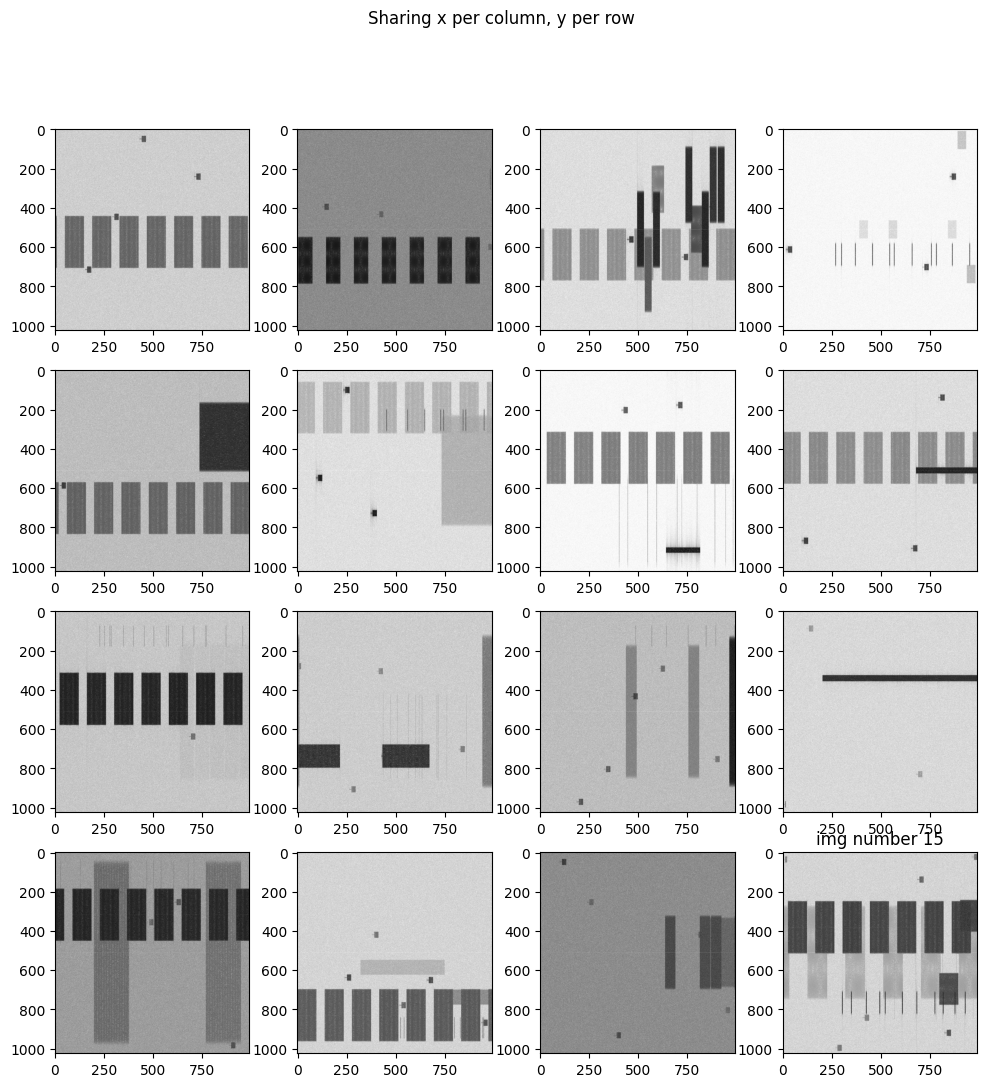

In [59]:
n = 4

fig, axs = plt.subplots(n, n, figsize= (12,12))
fig.suptitle('Sharing x per column, y per row')

"""
for ax in fig.get_axes():
    ax.label_outer()"""

for i in range(n**2):
    # load image
    im = plt.imread(f"{i}.bmp")
    im = 255 - np.stack((im,)*3, axis=-1)

    bbox_i = df.loc[df['img'] == f"{i}"]
    draw_bounding_boxes(im,bbox_i)

    axs[i//n,i%n].imshow(im)
    plt.title(f"img number {i}")

In [60]:
import object_detection
from object_detection.utils import dataset_util

flags = tf.compat.v1.flags
#flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
FLAGS = flags.FLAGS

def create_tf_example(info):
    # TODO START: Populate the following variables from your example.
    height = len(info[0]) # Image height
    width = len(info[0][0]) # Image width
    filename = f'{info[5]}' # Filename of the image. Empty if image is not from file
    filename = filename.encode()
    encoded_image_data = info[0].tobytes() # Encoded image bytes
    image_format = b'bmp' # b'jpeg' or b'png'

    xmins = [info[1][i]-info[3][i] for i in range(len(info[1]))] # List of normalized left x coordinates in bounding box (1 per box)
    xmaxs = [info[1][i]+info[3][i] for i in range(len(info[1]))] # List of normalized right x coordinates in bounding box # (1 per box)
    ymins = [info[2][i]-info[4][i] for i in range(len(info[2]))] # List of normalized top y coordinates in bounding box (1 per box)
    ymaxs = [info[2][i]+info[4][i] for i in range(len(info[2]))] # List of normalized bottom y coordinates in bounding box
    # (1 per box)
    classes_text = [b'rect' for i in range(len(info[1]))] # List of string class name of bounding box (1 per box)
    classes = [i for i in range(len(info[1]))] # List of integer class id of bounding box (1 per box)
    # TODO END
    tf_label_and_data = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_label_and_data

In [61]:

im=plt.imread("2.bmp")
bbox_2 = df.loc[df['img'] == "2"]
bbox_2_x=[i for i in bbox_2["x"]]
bbox_2_y=[i for i in bbox_2["y"]]
bbox_2_w=[i for i in bbox_2["w"]]
bbox_2_h=[i for i in bbox_2["h"]]
data_info = [im,bbox_2_x,bbox_2_y,bbox_2_w,bbox_2_h,"2"]
a= create_tf_example(data_info)
print(a)

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\013\033-\n\020\033\034\" \017\030-4/- \007!!?\000:\000\000&(\034\0001\022&\"\r\000\032.!0\006\022 \000\021\030,\0315\n*.+8\02363\006!\"\013/1\006\000\"\020\007\026\014\'3+\03095\035\000;\030.\") \026\022/\033(\001\032&5\023\0031\000\037.\024\000\033&\'4\')!\037\032)(#\037\037\021\0143\032( /(\026\000\000\020+\021\024\0003*1\003)\026\0329&5\0319\027\000!\r6\032\026/\r)\0053,\035\001A\021,/7\035-\031+ \r\002\004 :2.\031--\01044\"\0312;\022 )1\000\036\027\n,2\026\006\0000)\023%\031:7\0360\02278\016\020\000)\027\003 \010,;0\000\027\023 3\021\0345-&\035)\000\032\037\024\023 ,<7#)!\037$+\014\022:\033\021\r\037\000$$&\'\023\t\0207\023\030\0222005\000\037\0305/1\025\031+\000\007\000\r+B\0002\021\002\'6\0027\033$\034%#\".\024\0308/\026\000*,\030\000#\0374*\035\022\030/ B!2.6)\030643(\000\r:\0221\031\034\")\034\025333/7%,\'6\0058>,\030\0241\0247\037,,\036;\0309\0004\005\032\031\n#2 \010)\022 \000\n4\0

In [62]:



with tf.io.TFRecordWriter(path='my_tf_records/train') as train:
    for i in range(30):
        bbox = df.loc[df['img'] == f"{i}"]
        bbox_x=[j for j in bbox["x"]]
        bbox_y=[j for j in bbox["y"]]
        bbox_w=[j for j in bbox["w"]]
        bbox_h=[j for j in bbox["h"]]
        data_info = [im,bbox_x,bbox_y,bbox_w,bbox_h,f"{i}.bmp"]
        a= create_tf_example(data_info)
        train.write(a.SerializeToString())

with tf.io.TFRecordWriter(path='my_tf_records/test') as test:
    for i in range(30,40,1):
        bbox = df.loc[df['img'] == f"{i}"]
        bbox_x=[j for j in bbox["x"]]
        bbox_y=[j for j in bbox["y"]]
        bbox_w=[j for j in bbox["w"]]
        bbox_h=[j for j in bbox["h"]]
        data_info = [im,bbox_x,bbox_y,bbox_w,bbox_h,f"{i}.bmp"]
        a= create_tf_example(data_info)
        test.write(a.SerializeToString())


def decode_fn(record_bytes):
    return tf.io.parse_single_example(
        record_bytes,
        {
            'image/height': tf.io.FixedLenFeature([], dtype=tf.int64),
            'image/width': tf.io.FixedLenFeature([], dtype=tf.int64),
            'image/filename': tf.io.FixedLenFeature([], dtype=tf.string),
            'image/source_id': tf.io.FixedLenFeature([], dtype=tf.string),
            'image/encoded': tf.io.FixedLenFeature([], dtype=tf.string),
            'image/format': tf.io.FixedLenFeature([], dtype=tf.string),
            'image/object/bbox/xmin': tf.io.FixedLenFeature([], dtype=tf.float64),
            'image/object/bbox/xmax': tf.io.FixedLenFeature([], dtype=tf.float64),
            'image/object/bbox/ymin': tf.io.FixedLenFeature([], dtype=tf.float64),
            'image/object/bbox/ymax': tf.io.FixedLenFeature([], dtype=tf.float64),
            'image/object/class/text': tf.io.FixedLenFeature([], dtype=tf.string),
            'image/object/class/label': tf.io.FixedLenFeature([], dtype=tf.int64),


        })


In [63]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [64]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [65]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [66]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [67]:
if os.name=='nt':
    !pip install wget
    import wget

In [68]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [69]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Traceback (most recent call last):
  File "C:\Users\liev0501\DataspellProjects\rect1\Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_builder
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py", line 23, in <module>
    from object_detection.builders import anchor_generator_builder
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\anchor_generator_builder.py", line 22, in <module>
    from object_detection.anchor_generators import flexible_grid_anchor_generator
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\anchor_generators\flexible_grid_anchor_generator.py", line 19, in <module>
    from object_detection

In [70]:
!pip install tensorflow --upgrade

  Using cached protobuf-3.19.6-cp38-cp38-win_amd64.whl (896 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12


In [71]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\liev0501\\.conda\\envs\\newConda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.




  Using cached protobuf-4.21.12-cp38-cp38-win_amd64.whl (527 kB)
  Using cached matplotlib-3.2.0-cp38-cp38-win_amd64.whl (9.2 MB)


In [72]:
!pip list


Package                      Version     Editable project location
---------------------------- ----------- -------------------------------------------------------------------------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contextlib2                  21.6.0
contourpy                    1.0.7
cycler                       0.11.0
Cython                       0.29.33
debugpy                      1.6.5
decorator                    5.1.1


In [73]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [74]:
labels = [{'name':'rect', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [75]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
    !tar -zxvf {ARCHIVE_FILES}

In [76]:
!pip install pytz

In [44]:

!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}


Traceback (most recent call last):
  File "C:\Users\liev0501\DataspellProjects\rect1\Tensorflow\scripts\generate_tfrecord.py", line 21, in <module>
    import pandas as pd
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas-1.5.2-py3.10-win-amd64.egg\pandas\__init__.py", line 16, in <module>
    raise ImportError(
ImportError: Unable to import required dependencies:
pytz: No module named 'pytz'
Traceback (most recent call last):
  File "C:\Users\liev0501\DataspellProjects\rect1\Tensorflow\scripts\generate_tfrecord.py", line 21, in <module>
    import pandas as pd
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas-1.5.2-py3.10-win-amd64.egg\pandas\__init__.py", line 16, in <module>
    raise ImportError(
ImportError: Unable to import required dependencies:
pytz: No module named 'pytz'


In [77]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [78]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [91]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [92]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])


In [93]:
config


{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [94]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [95]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [89]:

!pip install cython
!pip install "git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI"

  Cloning https://github.com/philferriere/cocoapi.git to c:\users\liev0501\appdata\local\temp\pip-req-build-ketuly_v
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pycocotools
Failed to build pycocotools
  Running setup.py install for pycocotools: started
  Running setup.py install for pycocotools: finished with status 'error'


  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git 'C:\Users\liev0501\AppData\Local\Temp\pip-req-build-ketuly_v'
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1 lines of output]
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycocotools
  error: subprocess-exited-with-error
  
  python setup.py clean did not run successfully.
  exit code: 1
  
  [12 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\liev0501\AppData\Local\Temp\pip-req-build-ketuly_v\PythonAPI\setup.py", line 25, in <module>
      cyt

In [88]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

In [85]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [86]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [52]:

print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [99]:
!python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000

Traceback (most recent call last):
  File "C:\Users\liev0501\DataspellProjects\rect1\Tensorflow\models\research\object_detection\model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\eval_util.py", line 35, in <module>
    from object_detection.metrics import coco_evaluation
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\metrics\coco_evaluation.py", line 25, in <module>
    from object_detection.metrics import coco_tools
  File "C:\Users\liev0501\AppData\Local\Programs\Python\Python310\lib\site-packages\object_detection-0.1-py3

In [100]:
!pip install pycocotools

  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached matplotlib-3.6.3-cp38-cp38-win_amd64.whl (7.2 MB)
Failed to build pycocotools


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [16 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-38\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-38\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-38\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-38\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  building 'pycocotools._mask' extension
  C:\Users\liev0501\AppData\Local\Temp\pip-build-env-th7fseih\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\liev0501\AppData\Local\Temp\pip-install-rtkt2fnv\pycocotools_107e975

In [101]:
import tarfile
file = tarfile.open('pycocotools-2.0.6.tar.gz')

# extracting file
file.extractall('./coco')

In [ ]:
import pycocotools
